In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
data = pd.read_csv("E:\datasets.txt")
data.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [90]:
data2 = data.drop('Gender',axis = 1)

In [91]:
data2

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [92]:
positive = data[data['Purchased']==1]
negative = data[data['Purchased']==0]

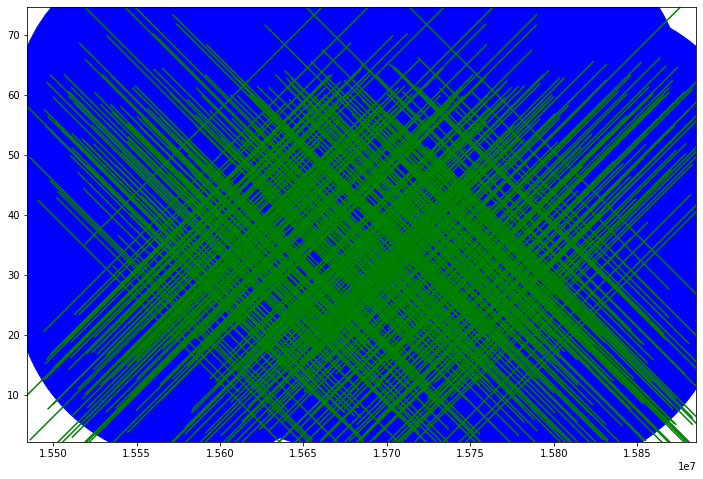

In [93]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['User ID'],positive['Age'],positive['EstimatedSalary'], c ='b',marker ='o')
ax.scatter(negative['User ID'],negative['Age'],negative['EstimatedSalary'], c ='g',marker ='x')

In [94]:
def computecost(X,y,theta):
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/(len(X))

In [95]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [96]:
data2.insert(0,'ones',1)
data2.head()

,ones,User ID,Age,EstimatedSalary,Purchased
0,1,15624510,19,19000,0
1,1,15810944,35,20000,0
2,1,15668575,26,43000,0
3,1,15603246,27,57000,0
4,1,15804002,19,76000,0


In [97]:
X = data2.iloc[:,0:4]
y = data2.iloc[:,4:5]

In [98]:
X

,ones,User ID,Age,EstimatedSalary
0,1,15624510,19,19000
1,1,15810944,35,20000
2,1,15668575,26,43000
3,1,15603246,27,57000
4,1,15804002,19,76000
...,...,...,...,...
395,1,15691863,46,41000
396,1,15706071,51,23000
397,1,15654296,50,20000
398,1,15755018,36,33000


In [99]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [ ]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix([0,0,0,0])

In [ ]:
computecost(X,y,theta)

In [102]:
def gradientdescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = 4
    cost = np.zeros(iters)
    for i in range(iters):
        error = sigmoid(X*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j]-((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i]= computecost(X,y,theta)
    return theta,cost

In [ ]:
final_theta ,cost_matrix = gradientdescent(X,y,theta,0.001,10000)

C:\Users\Devendra Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Devendra Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\Devendra Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Devendra Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
final_theta

In [ ]:
cost_matrix

In [ ]:
cost_matrix[-1]

In [ ]:
predicted_probabilities = sigmoid(X*final_theta.T)
predicted_probabilities